Import The Required Libraries
Import the warnings library in very project to ignore the warnings.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=[10,5]
warnings.simplefilter(action='ignore',category=FutureWarning)


Step :> Load the Dataset.

In [5]:
data='Titanic-Dataset.csv'
df=pd.read_csv(data)

Step 2:> Go through the dataset, check the datatypes of dataset and the null values within the dataset.

In [6]:
print(df.head())
print(df.info())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Step 3:> Fill the missing values 

In [7]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna('Unknown')   
df['Deck'] = df['Cabin'].astype(str).str[0] 
df['Deck'] = df['Deck'].replace('U', 'Unknown')

Step :>4 EDA(Exploratory Data analysis)

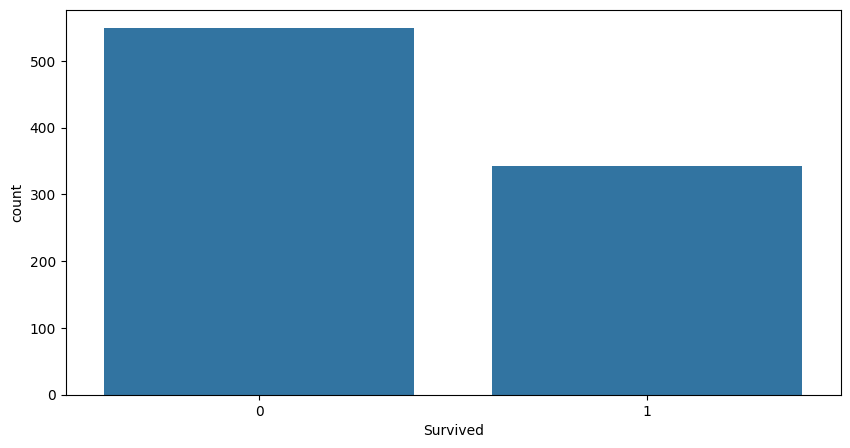

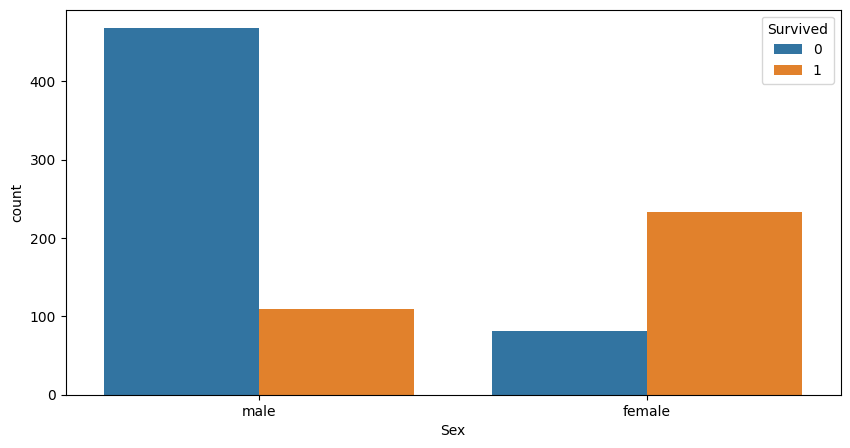

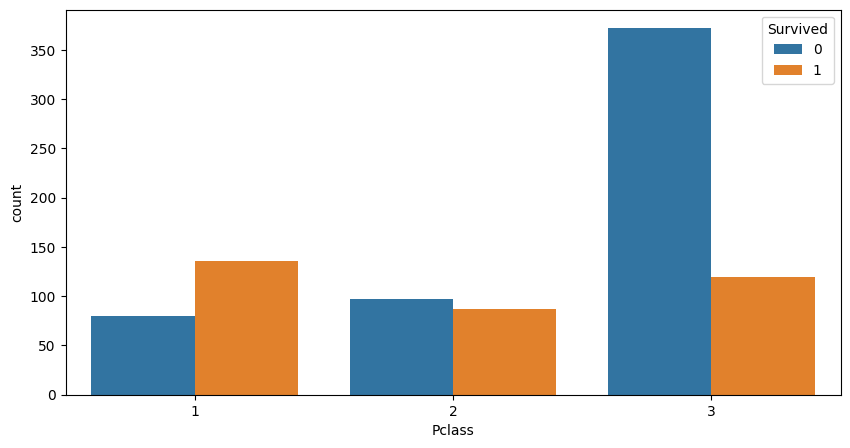

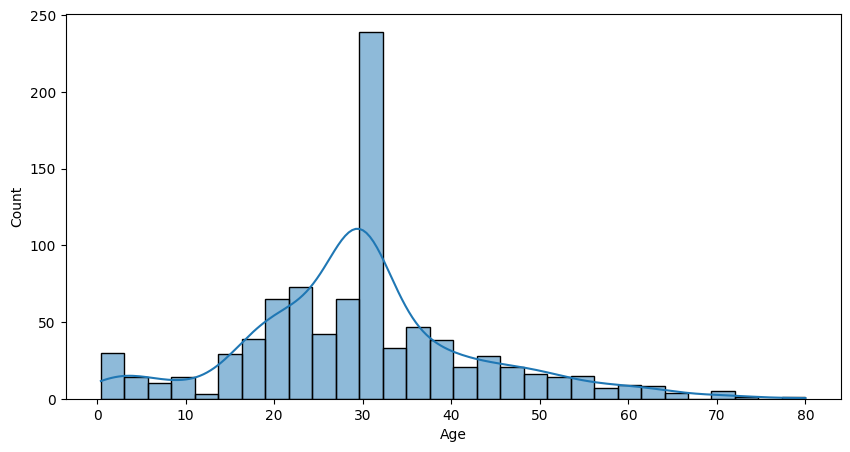

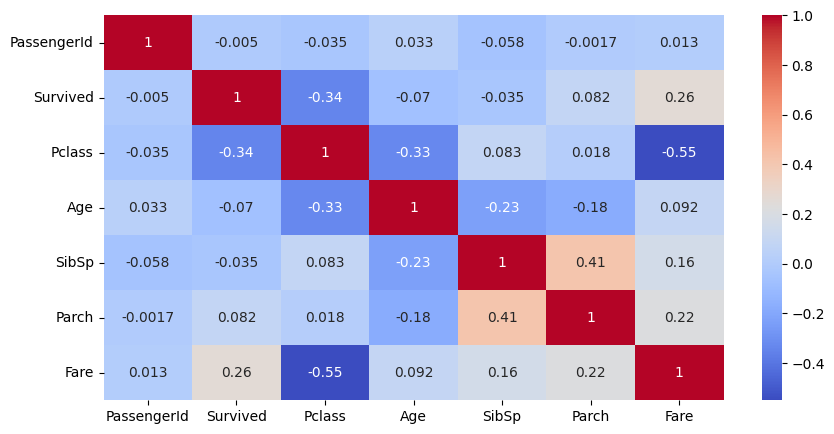

In [8]:
sns.countplot(x='Survived',data=df)
plt.show()

sns.countplot(x='Sex',hue='Survived',data=df)
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()

sns.histplot(df['Age'],kde=True)
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

Step :>5 Drop unnecessary column and Encoding

In [9]:
print(df.info())
df.drop(['Name','Ticket'],axis=1,inplace=True)
print(df.info())

df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Deck'], drop_first=True)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Deck         891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pas

Step:> 6 Splitting dataset into X and y: X is a feature and y is a target variable

In [10]:
X = df.drop(['Survived','Cabin'], axis=1)
y = df['Survived']


Step:> 7 Divide the data into training and testing data.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Step:> 8 Used the logistic regression to get the results that the person is survived or not.

In [12]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Step:> 9 Predict the model

In [13]:
y_pred=model.predict(X_test)

Step:> 10 Use multiple metrics to check the performance of model.

In [14]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification report
cr = classification_report(y_test, y_pred)
print(cr)

#Accuracy score
ac=accuracy_score(y_test,y_pred)
print(ac)

[[135  22]
 [ 31  80]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       157
           1       0.78      0.72      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

0.8022388059701493


Step :> 11 Get the predictions on new data

In [15]:
new_data = pd.DataFrame([[
    1000, 1, 32, 1, 1, 19.25,
    1, 0, 1, 
    0, 0, 0, 1, 0, 0, 0, 1
]], columns=X.columns)

y_pred1 = model.predict(new_data)
print(y_pred1)

[1]


#Step :> 12 Check the results between actual vs predicted.

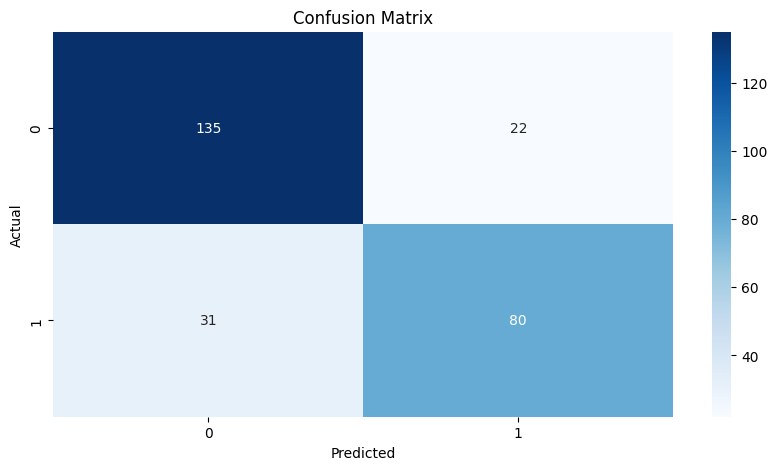

In [16]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Step :> 13 Use another model known as RandomForestclassifier to check the results between both models that who is performing well.
Get the important features and make a bar graph of features in descending order means the most dominating feature come first and then second like that.

Random Forest Accuracy: 0.8097014925373134
Logistic regression Accuracy: 0.8022388059701493


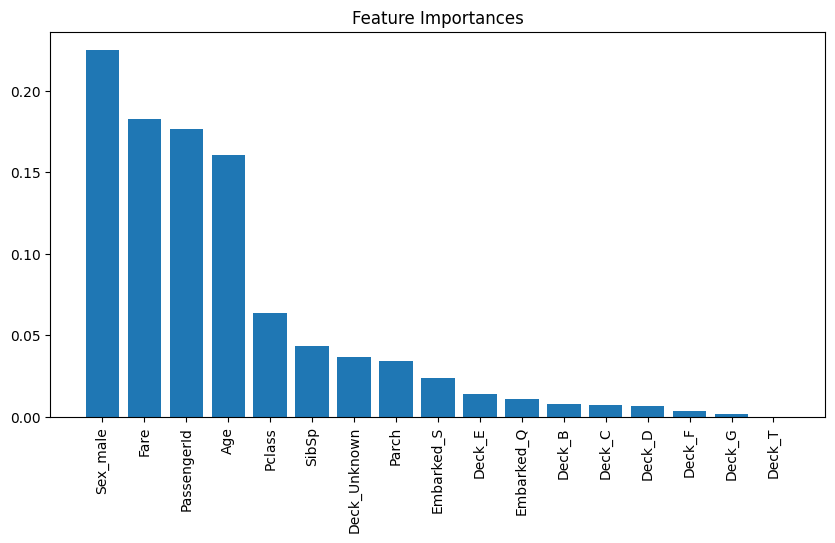

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Logistic regression Accuracy:", accuracy_score(y_test,y_pred))


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()
